<a href="https://colab.research.google.com/github/InowaR/colab/blob/main/SLAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

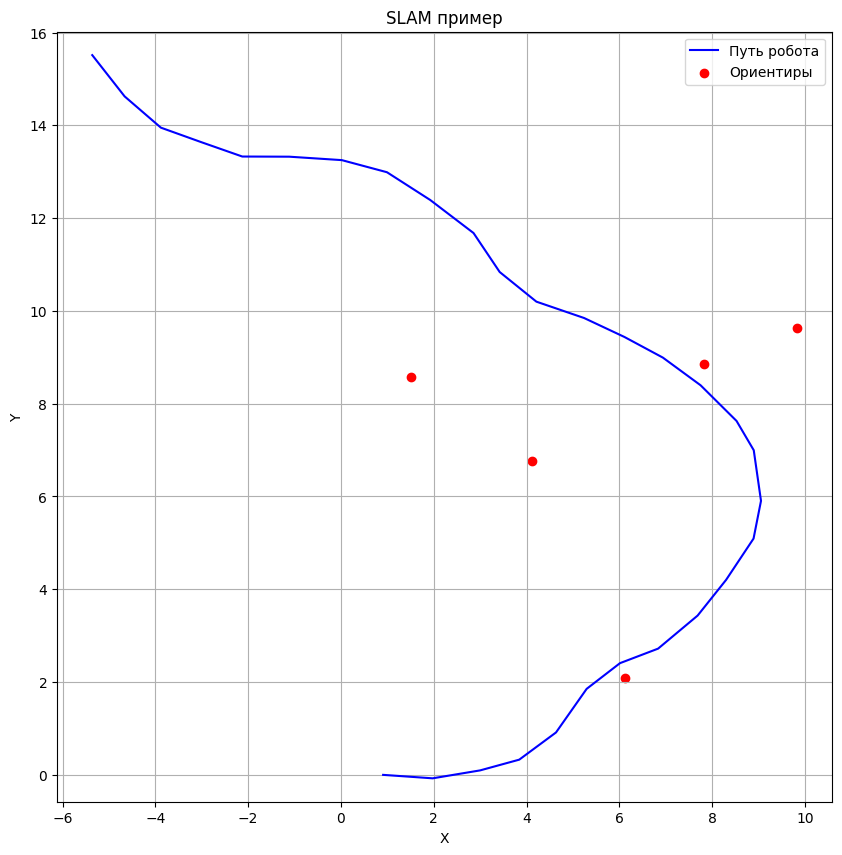

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры
num_landmarks = 5  # Количество ориентиров
num_steps = 30     # Количество шагов
dt = 1.0          # Время между шагами

# Инициализация
landmarks = np.random.rand(num_landmarks, 2) * 10  # Случайные координаты ориентиров
robot_pose = np.array([0, 0, 0])  # Начальная поза робота (x, y, theta)
robot_path = []
measurements = []

def move_robot(robot_pose, velocity, omega):
    """Обновление позы робота на основе скорости и угловой скорости."""
    x, y, theta = robot_pose
    x += velocity * np.cos(theta) * dt
    y += velocity * np.sin(theta) * dt
    theta += omega * dt
    return np.array([x, y, theta])

def observe_landmarks(robot_pose, landmarks):
    """Симуляция наблюдений за ориентирами."""
    x, y, theta = robot_pose
    measurements = []
    for landmark in landmarks:
        lx, ly = landmark
        distance = np.sqrt((lx - x)**2 + (ly - y)**2)
        angle = np.arctan2(ly - y, lx - x) - theta
        measurements.append((distance, angle))
    return measurements

# Основной цикл
for step in range(num_steps):
    velocity = 1.0 + np.random.randn() * 0.1  # Добавление шума к скорости
    omega = (np.random.rand() - 0.5) * np.pi / 4  # Добавление шума к угловой скорости

    # Движение робота
    robot_pose = move_robot(robot_pose, velocity, omega)
    robot_path.append(robot_pose[:2])  # Сохраняем только x и y

    # Наблюдения за ориентирами
    measurements.append(observe_landmarks(robot_pose, landmarks))

# Преобразование в массивы для удобства
robot_path = np.array(robot_path)
measurements = np.array(measurements)

# Визуализация результата
plt.figure(figsize=(10, 10))
plt.plot(robot_path[:, 0], robot_path[:, 1], label='Путь робота', color='blue')
plt.scatter(landmarks[:, 0], landmarks[:, 1], label='Ориентиры', color='red')
plt.title('SLAM пример')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid()
plt.axis('equal')
plt.show()